# Discriminant Analysis

by **[Tony Kabilan Okeke](mailto:tko35@drexel.edu)**

In this assignment you will analyze gene expression data available 
[here](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE7307).

The data contains samples from different human diseases and from different 
tissue types. For each sample, expression values of genes are given. For this 
assignment you are provided only with a pair of the tissues: Thalamus and 
Gloubus. The goal of this assignment is to differentiate samples from these two 
tisssues based on their gene expression values.

The data is very high dimensional, so you will first perform PCA to reduce 
dimensionaliy and keep only the first two principal components. You will then 
perform Linear and Quadratic Discriminant Analysis on this reduced, 
2-dimensional data. 

Download the data file. Nothing for you to change here.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import functions from sklearn
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Import other libraries
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

# Import functions from bmes
import os, sys; sys.path.append(os.environ['BMESAHMETDIR'])
from bmes import downloadurl

# Import plotting functions
from plotting import *

# Download data
URL = ('http://sacan.biomed.drexel.edu/lib/exe/fetch.php?media='
       'course:ml:data:tissues_thalamus_gloubus.xlsx')
file = downloadurl(URL, 'tissues_thalamus_gloubus.xlsx');

## Load the data

Read the data from the file and convert it into a usable format.

In [3]:
# Load data
df = pd.read_excel(file)

# Get numerical data
X = df.drop('id', axis=1).values.T

# Retrieve and clean labels
y = df.columns[1:].values
y = np.array([re.match(r"^[a-z]*", s).group(0) for s in y])

## Perform PCA

Keep only the first two dimensions of the data. Show a scatter plot of the 
samples, each class of samples in different color & style.

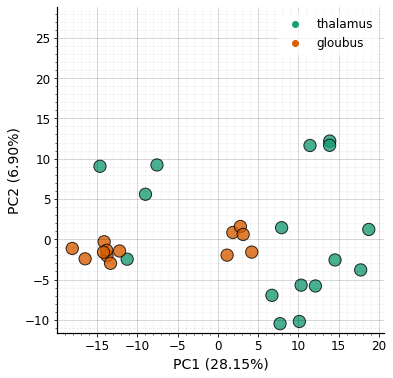

In [4]:
# PCA decomposition
pca = PCA(n_components=2)
pca.fit(X)
Xpca = pca.transform(X)
V = pca.explained_variance_ratio_

# Plot PCA
fig, ax = plotpca(Xpca, V, y)

## Perform Linear DA

Perform linear DA using the first two PC dimensions. Plot the decision boundary 
on top of the PCA plot. The samples should still be shown on this figure. Do not 
use meshgrid of points and plot them; instead use ezplot to draw the decision 
boundary. If you are using Python, you are allowed to use either method of 
displaying decision boundary.  

Report the classification error on the entire dataset.

Classification error: 31.03%


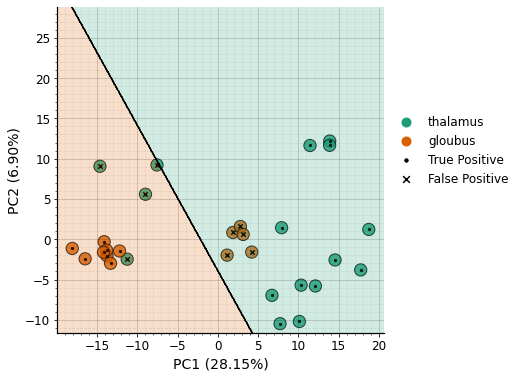

In [5]:
# Perform LDA
lda = LDA()
lda.fit(Xpca, y);

# Predict classes
y_pred = lda.predict(Xpca)

# Plot samples (PCA) and decision boundary
fig, ax = plotpca(Xpca, V, y)
plotdecisionbound(lda, Xpca, y, y_pred, ax);

# Compute classification error
err = np.sum(y != y_pred) / len(y)
print(f'Classification error: {err:.2%}')

## Perform Quadratic DA

Perform quadratic DA linear DA using the first two PC dimensions. Plot the 
decision boundary on top of the PCA plot. The samples should still be shown as 
above. The decision boundary for Linear DA should still be shown on this figure. 
Do not use meshgrid of points and plot them; instead use ezplot to draw the 
decision boundary. If you are using Python, you are allowed to use either method 
of displaying decision boundary.

Report the classification error on the entire dataset.

Classification error: 3.45%


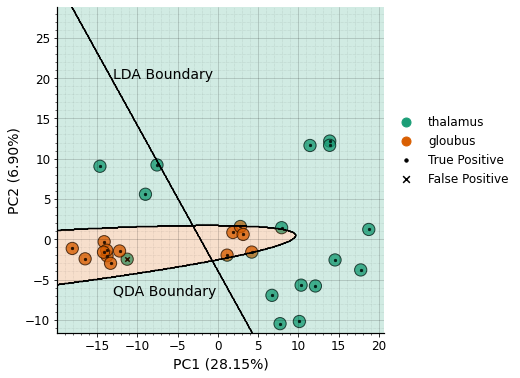

In [6]:
# Perform QDA
qda = QDA()
qda.fit(Xpca, y);

# Predict classes
y_pred = qda.predict(Xpca)

# Plot samples (PCA) and decision boundary for both LDA and QDA
fig, ax = plotpca(Xpca, V, y)
plotdecisionbound(lda, Xpca, y, y_pred, ax, shade=False, show_pf=False);
plotdecisionbound(qda, Xpca, y, y_pred, ax, shade=True, show_pf=True);

# Label decision boundaries
ax.text(-13, 20, 'LDA Boundary', fontsize=14, color='black')
ax.text(-13, -7, 'QDA Boundary', fontsize=14, color='black')

# Compute classification error
err = np.sum(y != y_pred) / len(y)
print(f'Classification error: {err:.2%}')

## Classification Performance Metrics

Use the Quadratic DA model you built above to answer the questions below. 
Consider Thalamus samples to be "positive" and Gloubus samples to be "negative".

Don't just hard-code the confusion-matrix indices:
- If you are using a function to obtain the confusion matrix, you need to make 
  sure that you refer to the matrix entries correctly. 
- Do not assume that the first row/column will be the positive class. You may: 
  - control the way confusion matrix is ordered, 
  - change the ordering if it doesn't match your assumptions, or 
  - use indexes that correctly refer to the correct row/column.

You must perform the calculations yourself, and not rely on a function that 
performs these performance metric calculations.

Sensitivity: 93.75%
Specificity: 100.00%
Precision: 100.00%
Error rate: 3.45%
Accuracy: 96.55%
F-Measure: 96.77%
Matthews Correlation Coefficient: 93.30%


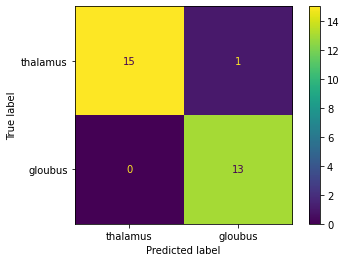

In [7]:
# Create confusion matrix where 'thalamus' is the positive class
cm = confusion_matrix(y, y_pred, labels=['thalamus', 'gloubus'])

# Plot confusion matrix
ConfusionMatrixDisplay(cm, display_labels=['thalamus', 'gloubus']).plot();

# Retrieve true and false positive and negative counts
# (Assume the first class is the positive class)
tp, fn, fp, tn = cm.ravel()

# What is the Sensitivity (aka Recall or True Positive Rate) ?
sensitivity = tp / (tp + fn)
print(f'Sensitivity: {sensitivity:.2%}')

# What is the Specificity (aka True Negative Rate or Selectivity) ?
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2%}')

# What is the Precision (aka Positive Predictive Value) ?
precision = tp / (tp + fp)
print(f'Precision: {precision:.2%}')

# What is the misclassification rate (aka error rate) ?
error_rate = (fp + fn) / (tp + tn + fp + fn)
print(f'Error rate: {error_rate:.2%}')

# What is the accuracy ?
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f'Accuracy: {accuracy:.2%}')

# What is the F-Measure?
f_measure = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f'F-Measure: {f_measure:.2%}')

# What is the Matthew's Correlation Coefficient?
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
print(f'Matthews Correlation Coefficient: {mcc:.2%}')